In [8]:
import keras
import os

#from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from PIL import Image, ImageOps

import pickle

In [9]:
descriptors_val = pickle.load(open("predictions_vgg19_val.p", "rb"))

In [10]:
descriptors_train = pickle.load(open("predictions_vgg19_train.p", "rb"))

In [11]:
imagen = pickle.load(open("save_img.p", "rb"))

In [12]:
imagen3 = pickle.load(open("save_img3.p", "rb"))

In [13]:
dic_val = pickle.load(open("save_dic_val.p", "rb"))

In [14]:
dic_train = pickle.load(open("save_dic_train.p", "rb"))

In [15]:
x_val = np.reshape(descriptors_val, (477,1000)) 

In [16]:
x_train = np.reshape(descriptors_train, (1194,1000)) 

In [17]:
x_val = sklearn.preprocessing.normalize(x_val, norm='l2', axis=1, copy=True, return_norm=False)

In [18]:
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)

In [19]:
descriptors_traint = x_train.transpose()

In [20]:
similarities=np.matmul(x_val,descriptors_traint)

In [21]:
ranks = np.argsort(similarities, axis=1)[:,::-1]

In [22]:
# get the original images for visualization
x_val_images = []
x_train_images = []

In [23]:
v = 0
for v in range(477): 
    x_val_images.append(np.array(imagen[v]))

In [24]:
b = 0
for b in range(1194): 
    x_train_images.append(np.array(imagen3[b]))

In [25]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*6,w*13))

In [26]:
# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
relnotrel = []
for q in range(477):
    ranks_q = ranks[q*(offset+1),:]
    relevant = dic_val[q*(offset+1)]
    rel_help = []
    for i in range(1194):
        if relevant == dic_train[ranks_q[i]] and relevant != "desconegut":
            new_image.paste(ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]), border=10, fill='green'), (h*(1+i),w*q))
            rel_help.append(1)
        else:
            new_image.paste(ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]), border=10, fill='red'), (h*(1+i),w*q))
            rel_help.append(0)
    relnotrel.append(np.asarray(rel_help))

  # visualize query
    ima_q = Image.fromarray(x_val_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=10, fill='blue')

    new_image.paste(ima_q, (0,w*q))

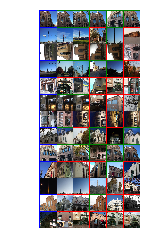

In [27]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [28]:
#new_image.save('val1.png')

In [29]:
guarda = []
accu_array =[]
AP = []
numRel_tot = []
for t in range(len(relnotrel)):
    numRel = 0
    accu = 0
    graphic = []
    for k in range(len(relnotrel[t])):

            # If the value is 1
            if relnotrel[t][k] == 1:

                # We add 1 to the number of correct instances
                numRel = numRel + 1

                # We calculate the precision at k (+1 because we start at 0)
                # and we accumulate it
                accu += float(numRel)/ float(k+1)
            graphic.append(float( numRel )/ float(k+1))
    if numRel != 0:
        numRel_tot.append(numRel)
        accu_array.append(accu)
        guarda.append(np.asarray(graphic))

In [30]:
AP = []
for h in range(len(numRel_tot)):
    AP.append(float(accu_array[h])/float(numRel_tot[h]))

In [31]:
MAP = np.sum(AP)/len(numRel_tot)

In [32]:
MAP * 100

23.501230314016315

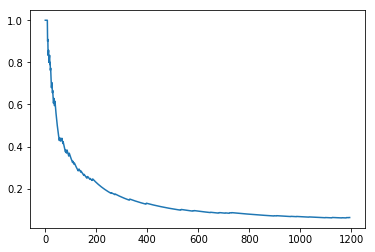

In [33]:
plt.plot(guarda[0])

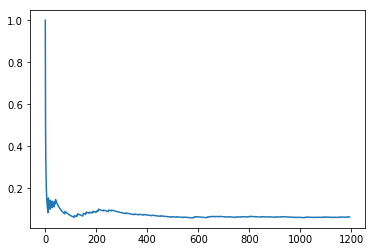

In [34]:
plt.plot(guarda[10])

In [35]:
guarda2 = []
for t2 in range(len(relnotrel)):
    graphic2 = []
    len_final = 0
    numRel2 = 0
    for k2 in range(len(relnotrel[t2])):

        # If the value is 1
        if relnotrel[t2][k2] == 1:

            # We add 1 to the number of correct instances
            numRel2 = numRel2 + 1
            
        graphic2.append(float( numRel2 )/ float(numRel))
    guarda2.append(np.asarray(graphic2))

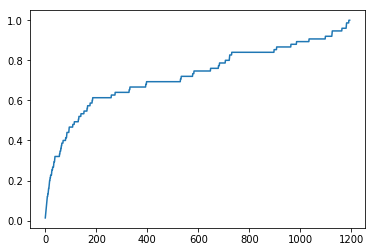

In [36]:
plt.plot(guarda2[0])

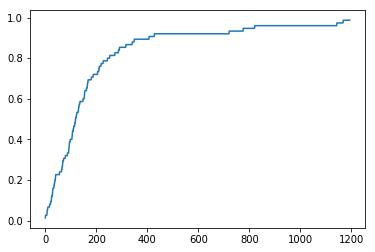

In [37]:
plt.plot(guarda2[10])

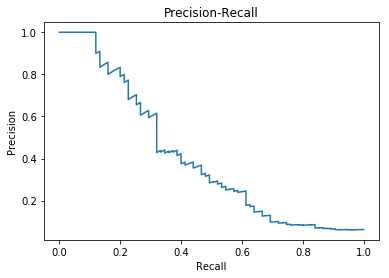

In [38]:
p = 0
guarda[p][0]= 1.0
guarda2[p][0]= 0.0
plt.plot(guarda2[p],guarda[p])
plt.title('Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()